# Repaso - Módulo 2

---
## Problema 1.1. Evaluación numérica de integrales utilizando Montecarlo

- En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales.
- El tipo 1 se basaba en la definición de valor promedio de una función.
- El tipo 2 se basaba en probabilidades y una variable aleatoria de bernoulli (para encontrar áreas).

    En clase desarrollamos funciones para la evaluación de integrales con ambos métodos. Explique por qué en el segundo método, el promedio del conjunto de variables aleatorias de Bernoulli $B=\{X_i\}$, se puede ver como una integral.

Escriba la función para integrar por el método Montecarlo de tipo 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

In [1]:
def montecarlo1(f,xmax,xmin,N):
    x=np.random.uniform(xmin,xmax,N)
    return (xmax-xmin)*np.mean(f(x))

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [3]:
N=np.logspace(1,5,5)
N=N.astype(int)
N

array([    10,    100,   1000,  10000, 100000])

Definición tentativa de cadena de funciones
```python
def f1(x):
    return np.sqrt(1+x**4)
...

funciones=[f1,f2,f3,f4]
```

In [19]:
funciones={'f1':lambda x:np.sqrt(1+x**4),
           'f2':lambda x:np.log(np.log(x)),
           'f3':lambda x:1/np.log(x),
           'f4':lambda x:np.exp(-x**2/2),
          'f5':lambda x:np.sin(x)/x}

In [8]:
funciones['f2'](5)

0.47588499532711054

In [14]:
#funciones.keys()  ->  'f1','f2',...
#funciones.items()  ->  ('f1',lambda f1)
for f in funciones: # for f in funciones.keys()
    print(funciones[f])

<function <lambda> at 0x00000017CC0A6048>
<function <lambda> at 0x00000017CC0A67B8>
<function <lambda> at 0x00000017CC0A6730>
<function <lambda> at 0x00000017CC0A66A8>


In [20]:
tabla=pd.DataFrame(index=N,columns=funciones.keys())
for n in N:
    for f in funciones:
        #print(f)
        tabla[f].loc[n]=montecarlo1(funciones[f],5,4,n)
tabla

,f1,f2,f3,f4,f5
10,20.0523,0.400649,0.667325,0.000114321,-0.213045
100,19.6873,0.40574,0.66772,5.64459e-05,-0.208282
1000,20.3353,0.406234,0.665757,8.01866e-05,-0.208478
10000,20.3774,0.405287,0.666837,7.7072e-05,-0.208248
100000,20.3483,0.405791,0.6671,7.86965e-05,-0.208239


## Problema 1.2.
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

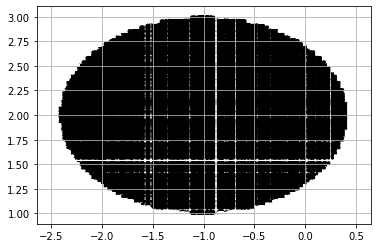

In [24]:
# límites en 'x'
a1=-2.5
b1=0.5

# límites en 'y'
a2=1
b2=3

# Graficamos la regióm
# Primero definimos la región
def reg(x,y):
    return x**2+2*y**2<=-2*x+8*y-7
# Ahora sí graficamos XD
N=300
x=np.random.uniform(a1,b1,N)
y=np.random.uniform(a2,b2,N)
X,Y=np.meshgrid(x,y)
plt.scatter(X,Y,c=~reg(X,Y),cmap='gray',s=5)
plt.grid('minor')

Los límites encontrados para $x$ son:
$$
-2.5\leq x \leq 0.5
$$
Los límites encontrados para $y$ son:
$$
1\leq y \leq 3
$$

---

Defina la función para resolver el área con el método 2 visto en clase

In [26]:
def montecarlo2(reg,a1,b1,a2,b2,N):
    x=np.random.uniform(a1,b1,N)
    y=np.random.uniform(a2,b2,N)
    AR=(b1-a1)*(b2-a2)
    th=np.mean(reg(x,y))
    err=np.sqrt((1-th)/(th))/np.sqrt(N)
    return AR*th,err

Encontrar el área con el número de términos deseados

In [27]:
N=np.logspace(1,5,5)
N=N.astype(int)
tabla=pd.DataFrame(index=N,columns=['Integral','error'])
for n in N:
    integral,err=montecarlo2(reg,a1,b1,a2,b2,n)
    tabla['Integral'].loc[n]=integral
    tabla['error'].loc[n]=err
tabla

,Integral,error
10,3.6,0.258199
100,4.56,0.0561951
1000,4.428,0.0188418
10000,4.4214,0.00597525
100000,4.43988,0.00187453


---
## Problema 2. Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [ ]:
import pandas as pd
import numpy as np

In [28]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


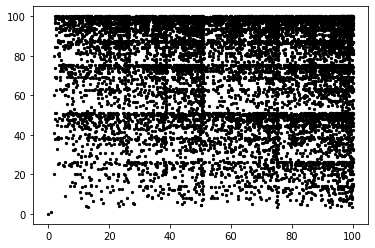

In [31]:
x=[0]
y=[0]
N=10**4
selector=df.index
for k in range(N):
    i=np.random.choice(selector,p=df['$p_i$'])
    a=df['$a_i$'][i]
    b=df['$b_i$'][i]
    c=df['$c_i$'][i]
    d=df['$d_i$'][i]
    e=df['$e_i$'][i]
    f=df['$f_i$'][i]
    x.append(a*x[-1]+b*y[-1]+e)
    y.append(c*x[-2]+d*y[-1]+f)
plt.scatter(x,y,c='k',s=5)

---
## Problema 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [33]:
#pd.read_csv('archivo')
#pd.read_excel?
#('archivo.odt')

In [35]:
import pandas_datareader.data as web

In [36]:
start='2015-01-01'
end='2019-12-31'
names=['AAPL','MSFT']
data=web.DataReader(names,'yahoo',start,end)['Adj Close']
data.head()

Symbols,AAPL,MSFT
Date,,
2015-01-02,24.861401,41.443684
2015-01-05,24.161013,41.062580
2015-01-06,24.163294,40.459892
2015-01-07,24.502111,40.973934
2015-01-08,25.443539,42.179317


Calcule los rendimientos diarios junto con sus características estadísticas

Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

Calcule los precios con base en los rendimientos simulados

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.